In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('advertising.csv')
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
def correlation(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sqrt(np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2))

    if denominator == 0:
        return 0
    
    return numerator / denominator

In [12]:
x = data['Radio']
y = data['Newspaper']

result = correlation(x, y)
print(round(result, 2))

0.35


In [13]:
features = ['TV', 'Radio', 'Newspaper']

for feature_1 in features:
    for feature_2 in features:
        correlation_value = correlation(data[feature_1], data[feature_2])
        print(f'{feature_1} and {feature_2}: {round(correlation_value, 2)}')

TV and TV: 1.0
TV and Radio: 0.05
TV and Newspaper: 0.06
Radio and TV: 0.05
Radio and Radio: 1.0
Radio and Newspaper: 0.35
Newspaper and TV: 0.06
Newspaper and Radio: 0.35
Newspaper and Newspaper: 1.0


## Find the correlation by using the numpy corrcoef function.

In [14]:
x = data['Radio']
y = data['Newspaper']

result = np.corrcoef(x, y)
print(result)

[[1.         0.35410375]
 [0.35410375 1.        ]]


## Visualization using matplotlib

In [3]:
# Calculate the correlation matrix
data_corr_coef = data.corr()
data_corr_coef

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


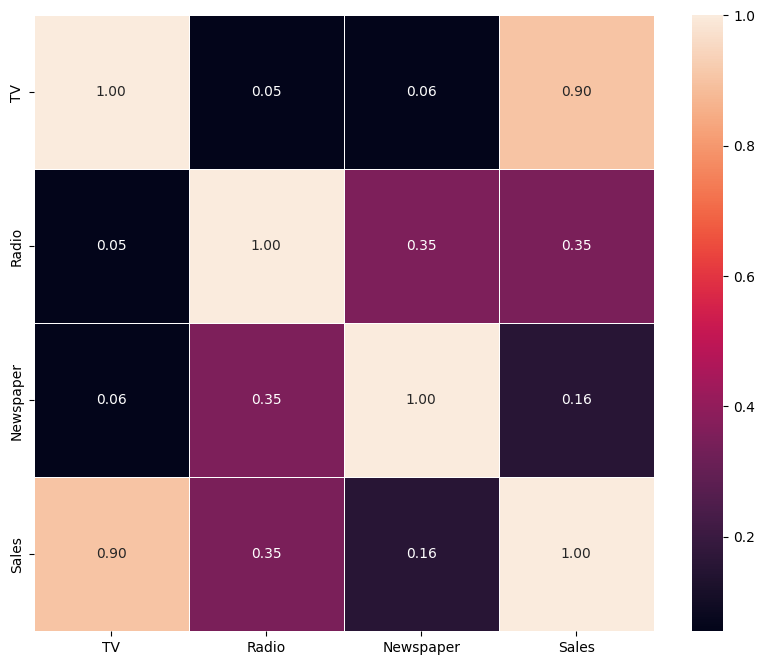

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(data_corr_coef, annot=True, fmt=".2f", linewidth=.5)
plt.show()

Hệ số tương quan Pearson: 0.9945


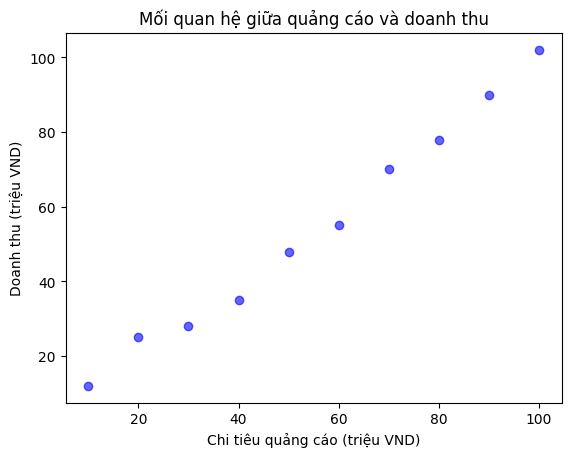

In [6]:
ads_spend = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
sales = np.array([12, 25, 28, 35, 48, 55, 70, 78, 90, 102])

# Tính hệ số tương quan Pearson sử dụng numpy
mean_ads = np.mean(ads_spend)
mean_sales = np.mean(sales)

numerator = np.sum((ads_spend - mean_ads) * (sales - mean_sales))
denominator = np.sqrt(np.sum((ads_spend - mean_ads)**2) * np.sum((sales - mean_sales)**2))

pearson_coeff = numerator / denominator
print(f'Hệ số tương quan Pearson: {pearson_coeff:.4f}')

plt.scatter(ads_spend, sales, color='blue', alpha=0.6)
plt.xlabel('Chi tiêu quảng cáo (triệu VND)')
plt.ylabel('Doanh thu (triệu VND)')
plt.title('Mối quan hệ giữa quảng cáo và doanh thu')
plt.grid(False)
plt.show()

In [8]:
from scipy.stats import pearsonr

Hệ số tương quan Pearson: -0.8041


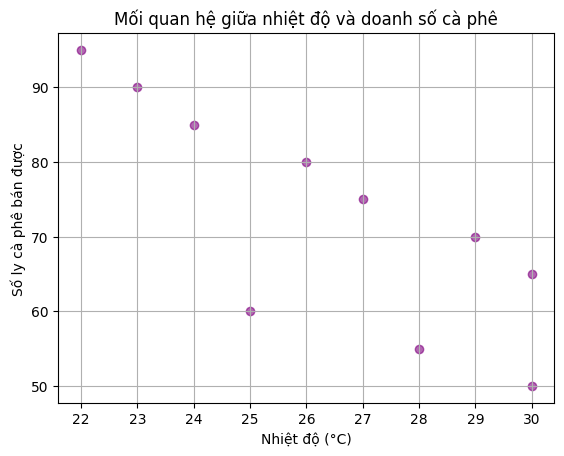

In [10]:
temperature = np.array([30, 28, 25, 30, 29, 27, 26, 24, 23, 22])
coffee_sales = np.array([50, 55, 60, 65, 70, 75, 80, 85, 90, 95])

pearson_coeff = pearsonr(temperature, coffee_sales)[0]
print(f'Hệ số tương quan Pearson: {pearson_coeff:.4f}')

plt.scatter(temperature, coffee_sales, color='purple', alpha=0.6)
plt.xlabel("Nhiệt độ (°C)")
plt.ylabel("Số ly cà phê bán được")
plt.title("Mối quan hệ giữa nhiệt độ và doanh số cà phê")
plt.grid(True)
plt.show()